In [2]:
%matplotlib inline
from glob import glob

import matplotlib.pyplot as plt
import numpy as np

# Density functional and structure/diffusion of \[HOAc\]\[C$_1$Im\] (preview)

In [5]:
# previous analyses -- run2 (out of 0,1,2)
pre_pbe = "../exp/prod-adam-run2/analyses/cp2k"
pre_hicut = "../preview/analyses/nvt-hicut/cp2k/"
pre_scan = "../exp/scan/analyses/prod/nvt-340k-5ns-0"

pre_340 = "../exp/prod-adam-run2/analyses/prod/nvt-340k-5ns-0"
pre_380 = "../exp/prod-adam-run2/analyses/prod/nvt-380k-5ns-0"
pre_450 = "../exp/transfer/analyses/prod/nvt-450k-5ns-0"

## Diffusion coefficients

../exp/scan/analyses/prod/nvt-340k-5ns-0---
H: 3.12(0.43) ,O: 2.86(0.37) ,N: 3.67(0.52) 


Text(0.5, 1.0, 'SCAN/hi-340K')

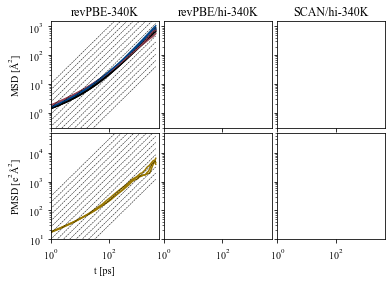

In [15]:
f, axss = plt.subplots(2, 3, figsize=[6, 4], sharex=True, sharey='row', gridspec_kw={'wspace':0.05,'hspace':0.05})
d = lambda msd, idx: msd[-1, idx]/msd[-1, 0]/6*100
rho = 1.0753e3
NA = 6.022e23
MW = (60.052 + 82.10) * 1e-3
q = 1.602176634e-19
T = 340
kB = 1.380649e-23
ne_fac = rho / MW * q**2 / (kB * T) * NA * 10 * 1e-10
gk_fac = rho / MW * q**2 / (kB * T) * NA * 10 / 32 * 1e-10

for pre, axs in zip([pre_scan], axss.T):
    systems = glob(f"{pre}/*-r1.08")
    print(f"{pre}---")
    axs[1].set_xlabel("t [ps]")
    d_all = []
    for sys in systems:
        try:
            msd = np.load(f"{sys}/msd-0-5ns/msd.npy")
        except:
            continue
        axs[0].plot(msd[:, 0], msd[:, 1], color="k")
        axs[0].plot(msd[:, 0], msd[:, 2], color="C1")
        axs[0].plot(msd[:, 0], msd[:, 3], color="C0")
        try:
            pmsd = np.load(f"{sys}/msd-0-5ns/pmsd.npy")
            axs[1].plot(msd[:, 0], pmsd[:, 1], color="C2")
            d_all.append([d(msd,1), d(msd,2), d(msd,3), d(pmsd, 1)])
        except:
            d_all.append([d(msd,1), d(msd,2), d(msd,3)])
            
    d_avg = np.mean(d_all, axis=0)
    d_std = np.std(d_all, axis=0)
    print(f'H: {d_avg[0]:.2f}({d_std[0]:.2f}) ,'
          f'O: {d_avg[1]:.2f}({d_std[1]:.2f}) ,'
          f'N: {d_avg[2]:.2f}({d_std[2]:.2f}) ' 
         )
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[0].set_xlim([1,5000])
    axs[1].set_xlim([1,5000])
    axs[0].set_ylim([0.3,1500])
    axs[1].set_ylim([10,50000])
    
    for i in np.linspace(-2,1,15):
        axs[0].plot(msd[:, 0], msd[:, 0]*10**i, lw=0.5, ls='--', color='k')
        axs[1].plot(msd[:, 0], msd[:, 0]*30*10**i, lw=0.5, ls='--', color='k')
    
axss[0,0].set_ylabel("MSD [$\AA^2$]")
axss[1,0].set_ylabel("PMSD [$e^2\AA^2$]")

axss[0,0].set_title("revPBE-340K")
axss[0,1].set_title("revPBE/hi-340K")
axss[0,2].set_title("SCAN/hi-340K")
#plt.savefig('fit_dft.pdf')

../exp/prod-adam-run2/analyses/prod/nvt-340k-5ns-0---
H: 0.17(0.06) ,O: 0.17(0.03) ,N: 0.15(0.05) 
../exp/prod-adam-run2/analyses/prod/nvt-380k-5ns-0---
H: 0.64(0.10) ,O: 0.55(0.09) ,N: 0.69(0.10) 
../exp/transfer/analyses/prod/nvt-450k-5ns-0---
H: 2.35(0.04) ,O: 2.47(0.31) ,N: 2.53(0.04) 


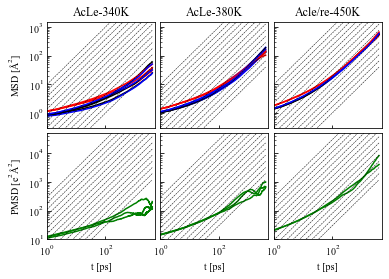

In [148]:
f, axss = plt.subplots(2, 3, figsize=[6, 4], sharex=True, sharey='row', gridspec_kw={'wspace':0.05,'hspace':0.05})
d = lambda msd, idx: msd[-1, idx]/msd[-1, 0]/6*100
rho = 1.0753e3
NA = 6.022e23
MW = (60.052 + 82.10) * 1e-3
q = 1.602176634e-19
T = 340
kB = 1.380649e-23
ne_fac = rho / MW * q**2 / (kB * T) * NA * 10 * 1e-10
gk_fac = rho / MW * q**2 / (kB * T) * NA * 10 / 32 * 1e-10

for pre, axs in zip([pre_340, pre_380, pre_450], axss.T):
    systems = glob(f"{pre}/*-r1.08")
    print(f"{pre}---")
    axs[1].set_xlabel("t [ps]")
    d_all = []
    for sys in systems:
        try:
            msd = np.load(f"{sys}/msd-0-5ns/msd.npy")
        except:
            continue
        axs[0].plot(msd[:, 0], msd[:, 1], color="k")
        axs[0].plot(msd[:, 0], msd[:, 2], color="r")
        axs[0].plot(msd[:, 0], msd[:, 3], color="b")
        # d_all.append([d(msd,1), d(msd,2), d(msd,3)])
        pmsd = np.load(f"{sys}/msd-0-5ns/pmsd.npy")
        axs[1].plot(msd[:, 0], pmsd[:, 1], color="g")
        d_all.append([d(msd,1), d(msd,2), d(msd,3), d(pmsd, 1)])
    d_avg = np.mean(d_all, axis=0)
    d_std = np.std(d_all, axis=0)
    print(f'H: {d_avg[0]:.2f}({d_std[0]:.2f}) ,'
          f'O: {d_avg[1]:.2f}({d_std[1]:.2f}) ,'
          f'N: {d_avg[2]:.2f}({d_std[2]:.2f}) ' 
          #f'GK: {d_avg[3]*gk_fac:.2f} '
          #f'Delta: {1-d_avg[3]*gk_fac/((d_avg[1]+d_avg[2])*ne_fac):.3f}'
         )
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[0].set_xlim([1,5000])
    axs[1].set_xlim([1,5000])
    axs[0].set_ylim([0.3,1500])
    axs[1].set_ylim([10,50000])
    
    for i in np.linspace(-2,1,15):
        axs[0].plot(msd[:, 0], msd[:, 0]*10**i, lw=0.5, ls='--', color='k')
        axs[1].plot(msd[:, 0], msd[:, 0]*30*10**i, lw=0.5, ls='--', color='k')
    
axss[0,0].set_ylabel("MSD [$\AA^2$]")
axss[1,0].set_ylabel("PMSD [$e^2\AA^2$]")

axss[0,0].set_title("AcLe-340K")
axss[0,1].set_title("AcLe-380K")
axss[0,2].set_title("Acle/re-450K")
plt.savefig('fit_acle.pdf')

In [142]:
msd[-1,0]

4000.0

## RDF

Text(0.5, 1.0, 'SCAN')

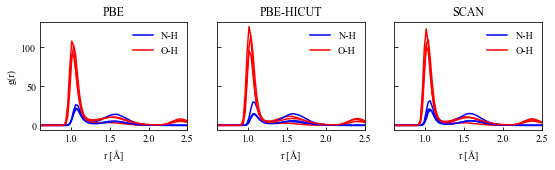

In [5]:
f, axs = plt.subplots(1, 3, figsize=[9, 2], sharex=True, sharey=True)
for pre, ax in zip([pre_pbe, pre_hicut, pre_scan], axs):
    systems = glob(f"{pre}/*-rho1.0753")
    ax.set_xlim([0.6, 2.5])
    ax.set_xlabel("r [$\AA$]")
    for sys in systems:
        rdf = np.loadtxt(f"{sys}/rdf-10-110ps/HN_rdf.dat")
        (l1,) = ax.plot(rdf[:, 0], rdf[:, 1], color="b")
        rdf = np.loadtxt(f"{sys}/rdf-10-110ps/HO_rdf.dat")
        (l2,) = ax.plot(rdf[:, 0], rdf[:, 1], color="r")
    ax.legend([l1, l2], ["N-H", "O-H"])

axs[0].set_ylabel("g(r)")
axs[0].set_title("PBE")
axs[1].set_title("PBE-HICUT")
axs[2].set_title("SCAN")

## HB structure wrt. time

['../exp/scan/analyses/prod/nvt-340k-5ns-0/a0b0i32-r1.08/hbnet.dat', '../exp/scan/analyses/prod/nvt-340k-5ns-0/a32b32i0-r1.08/hbnet.dat', '../exp/scan/analyses/prod/nvt-340k-5ns-0/a16b16i16-r1.08/hbnet.dat']


Text(0.5, 1.0, 'SCAN')

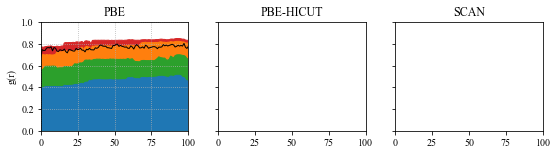

In [12]:
window = 10

f, axs = plt.subplots(1, 3, figsize=[9, 2], sharex=True, sharey=True)


for pre, ax in zip([pre_scan], axs):
    files = glob(f"{pre}/a*-r1.08/hbnet.dat")
    print(files)
    hbnet =  [np.loadtxt(data) for data in files]
    hbnet = np.array(hbnet)
    t = hbnet[0,::window,0]
    molperc = hbnet[:,:,1].reshape([hbnet.shape[0],-1,window])/32.
    molperc = molperc.mean(axis=2)
    hbpop = hbnet[:,:,3:].cumsum(axis=2)/64.
    hbpop = hbpop.reshape([hbpop.shape[0],-1,window,hbpop.shape[-1]]).mean(axis=2)
    colors = ['tab:blue', 'tab:green', 'tab:orange', 'tab:red']
    for x, color in list(zip(hbpop.T, colors))[::-1]:
        h = ax.fill_between(t, x.mean(axis=1), color=color, alpha=1)
    l, = ax.plot(t, molperc.mean(axis=0), 'k-', lw=1)
    ax.grid()
    ax.set_xlim(0,100)
    ax.set_ylim(0,1)

axs[0].set_ylabel("g(r)")
axs[0].set_title("PBE")
axs[1].set_title("PBE-HICUT")
axs[2].set_title("SCAN")

1211865.0 378567.0 505724.6666666667


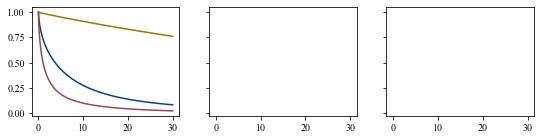

In [13]:
window = 1

f, axs = plt.subplots(1, 3, figsize=[9, 2], sharex=True, sharey=True)


for pre, ax in zip([pre_scan], axs):
    files = glob(f"{pre}/a*-r1.08/persist.dat")
    t, a, b, p = np.mean([np.loadtxt(f) for f in files], axis=0).T
    print(a[0],b[0],p[0])
    ax.plot(t, a/a[0])
    ax.plot(t, b/b[0])
    ax.plot(t, p/p[0])

## AcLe results 

First attempt (23Sep06), AcLe loops do not reach 1ns sampling time yet, possibly due to tight convergence criterion.

../exp/hicut/analyses/prod/nvt-340k-5ns-0---
H: 0.50(0.21) ,O: 0.45(0.18) ,N: 0.54(0.11) 
../exp/scan/analyses/prod/nvt-340k-5ns-0---
H: 1.74(0.39) ,O: 1.88(0.25) ,N: 2.44(0.37) 


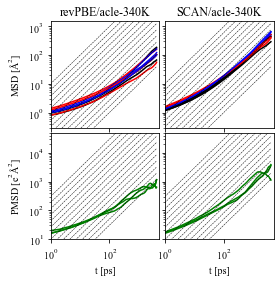

In [31]:
pre_hicut = "../exp/hicut/analyses/prod/nvt-340k-5ns-0"
pre_scan = "../exp/scan/analyses/prod/nvt-340k-5ns-0"

f, axss = plt.subplots(2, 2, figsize=[4, 4], sharex=True, sharey='row', gridspec_kw={'wspace':0.05,'hspace':0.05})
d = lambda msd, idx: msd[-1, idx]/msd[-1, 0]/6*100
rho = 1.0753e3
NA = 6.022e23
MW = (60.052 + 82.10) * 1e-3
q = 1.602176634e-19
T = 340
kB = 1.380649e-23
ne_fac = rho / MW * q**2 / (kB * T) * NA * 10 * 1e-10
gk_fac = rho / MW * q**2 / (kB * T) * NA * 10 / 32 * 1e-10

for pre, axs in zip([pre_hicut, pre_scan], axss.T):
    systems = glob(f"{pre}/*-r1.08")
    print(f"{pre}---")
    axs[1].set_xlabel("t [ps]")
    d_all = []
    for sys in systems:
        try:
            msd = np.load(f"{sys}/msd-0-5ns/msd.npy")
        except:
            continue
        axs[0].plot(msd[:, 0], msd[:, 1], color="k")
        axs[0].plot(msd[:, 0], msd[:, 2], color="r")
        axs[0].plot(msd[:, 0], msd[:, 3], color="b")
        # d_all.append([d(msd,1), d(msd,2), d(msd,3)])
        pmsd = np.load(f"{sys}/msd-0-5ns/pmsd.npy")
        axs[1].plot(msd[:, 0], pmsd[:, 1], color="g")
        d_all.append([d(msd,1), d(msd,2), d(msd,3), d(pmsd, 1)])
    d_avg = np.mean(d_all, axis=0)
    d_std = np.std(d_all, axis=0)
    print(f'H: {d_avg[0]:.2f}({d_std[0]:.2f}) ,'
          f'O: {d_avg[1]:.2f}({d_std[1]:.2f}) ,'
          f'N: {d_avg[2]:.2f}({d_std[2]:.2f}) ' 
          #f'GK: {d_avg[3]*gk_fac:.2f} '
          #f'Delta: {1-d_avg[3]*gk_fac/((d_avg[1]+d_avg[2])*ne_fac):.3f}'
         )
    axs[0].set_xscale('log')
    axs[0].set_yscale('log')
    axs[1].set_xscale('log')
    axs[1].set_yscale('log')
    axs[0].set_xlim([1,5000])
    axs[1].set_xlim([1,5000])
    axs[0].set_ylim([0.3,1500])
    axs[1].set_ylim([10,50000])
    
    for i in np.linspace(-2,1,15):
        axs[0].plot(msd[:, 0], msd[:, 0]*10**i, lw=0.5, ls='--', color='k')
        axs[1].plot(msd[:, 0], msd[:, 0]*30*10**i, lw=0.5, ls='--', color='k')
    
axss[0,0].set_ylabel("MSD [$\AA^2$]")
axss[1,0].set_ylabel("PMSD [$e^2\AA^2$]")

axss[0,0].set_title("revPBE/acle-340K")
axss[0,1].set_title("SCAN/acle-340K")
plt.savefig('fit_acle.pdf')